In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [9]:
df = pd.read_csv('cars.csv', delimiter=',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [10]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


In [11]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,41007.000000,4.100700e+04,41007.000000,4.100700e+04
mean,2007.976175,4.567353e+05,1853.856732,9.727109e+03
std,8.241487,4.451897e+06,700.364532,5.043926e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,8.750000e+04,1500.000000,3.500000e+03
50%,2009.000000,1.680000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.215000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


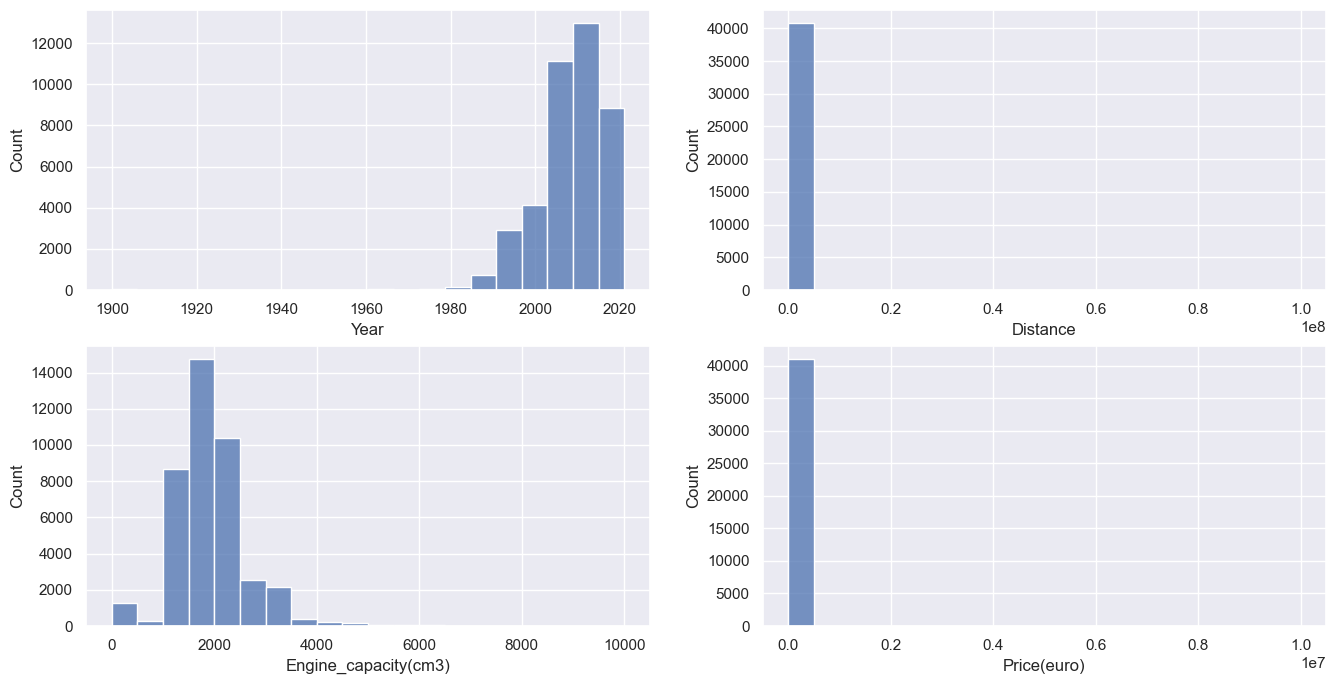

In [12]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

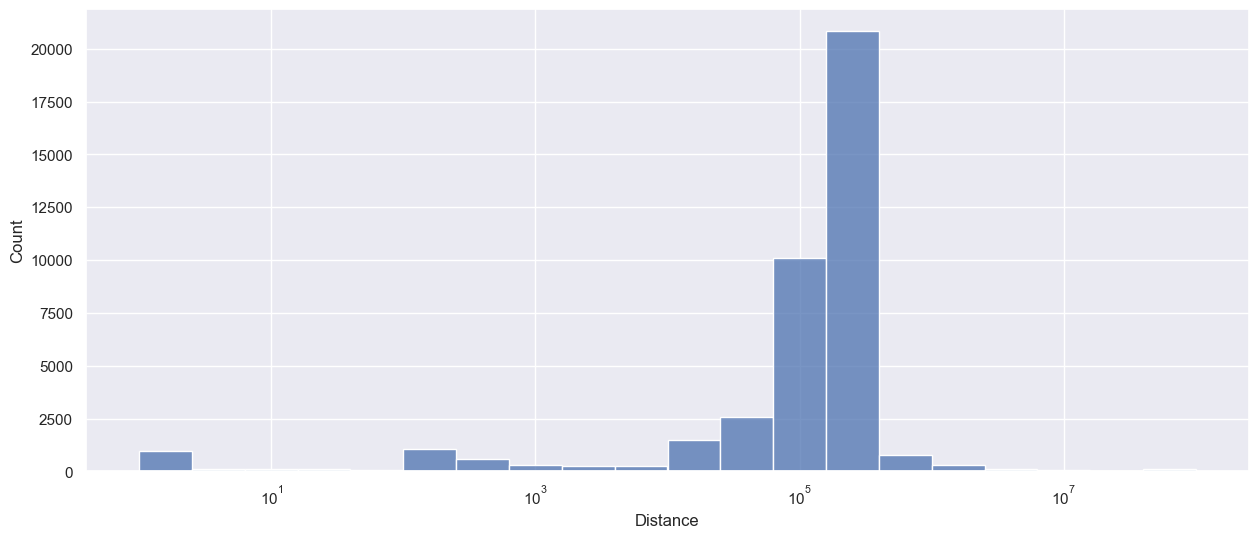

In [13]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)

plt.figure(figsize=(15,6))
sns.histplot(data=df,
        x='Distance', bins = 20, log_scale = True);

In [14]:
# здравый смысл
question_dist = df[(df.Year <2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# анализ гистограмм
question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# здравый смысл
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# здравый смысл
question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

# анализ гистограмм
question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

#анализ гистограмм
question_year = df[df.Year < 1971]
df = df.drop(question_year.index)

df = df.reset_index(drop=True)
df.tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
35840,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
35841,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
35842,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
35843,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0
35844,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


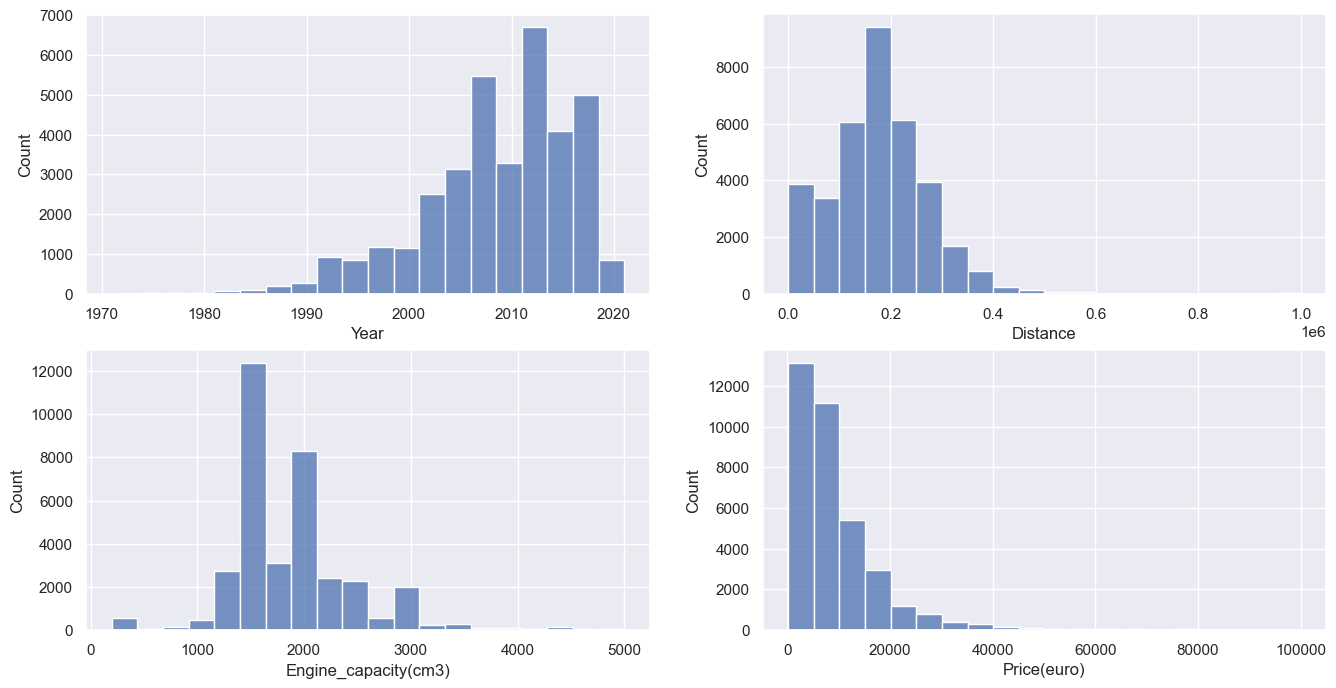

In [15]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

In [16]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Transmission',
             palette = 'bwr',)